<a href="https://colab.research.google.com/github/MURALAAYYAPPA/Data-Visualization/blob/main/Daily%20Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

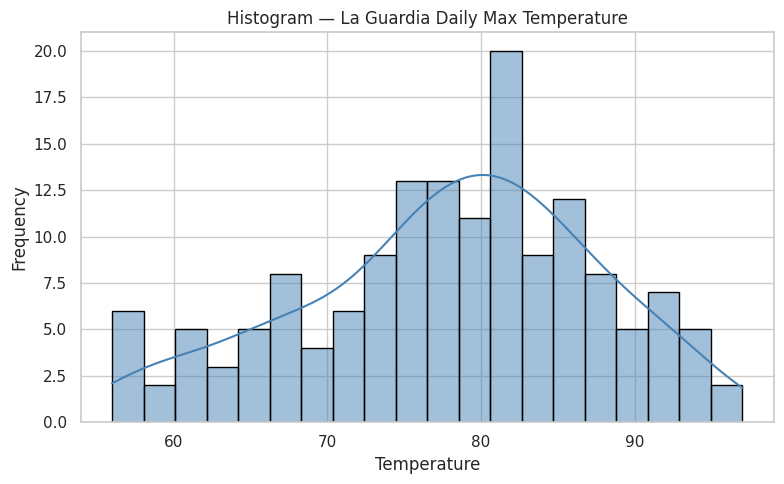

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from math import pi

sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Load data
df = pd.read_csv("airquality.csv")
df.columns = [c.strip() for c in df.columns]

# Identify temperature column
if 'Temp' in df.columns:
    temp_col = 'Temp'
elif 'Temperature' in df.columns:
    temp_col = 'Temperature'
else:
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    temp_col = numeric[0]

# Create x-axis (date or index)
if 'Date' in df.columns:
    df['__date'] = pd.to_datetime(df['Date'], errors='coerce')
    xcol = '__date'
elif {'Year','Month','Day'}.issubset(df.columns):
    df['__date'] = pd.to_datetime(df[['Year','Month','Day']])
    xcol = '__date'
else:
    df['__day_index'] = np.arange(1, len(df)+1)
    xcol = '__day_index'

# Clean data
df = df.dropna(subset=[temp_col]).reset_index(drop=True)

# Add Month & Day if missing
if 'Month' not in df.columns and xcol == '__date':
    df['Month'] = df[xcol].dt.month
if 'Day' not in df.columns and xcol == '__date':
    df['Day'] = df[xcol].dt.day

# Temperature categories
bins = [
    df[temp_col].min() - 1,
    df[temp_col].quantile(0.25),
    df[temp_col].quantile(0.5),
    df[temp_col].quantile(0.75),
    df[temp_col].max() + 1
]

labels = ['Very Low', 'Low', 'Moderate', 'High']
df['Temp_Category'] = pd.cut(
    df[temp_col],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df[temp_col], bins=20, kde=True,
             color='steelblue', edgecolor='black')
plt.title("Histogram — La Guardia Daily Max Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from math import pi
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

In [ ]:
df = pd.read_csv("airquality.csv")
df.columns = [c.strip() for c in df.columns]
df

,,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [ ]:
# Identify temperature column
if 'Temp' in df.columns:
    temp_col = 'Temp'
elif 'Temperature' in df.columns:
    temp_col = 'Temperature'
else:
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    temp_col = numeric[0]


In [ ]:
# Create x-axis (date or index)
if 'Date' in df.columns:
    df['__date'] = pd.to_datetime(df['Date'], errors='coerce')
    xcol = '__date'
elif {'Year','Month','Day'}.issubset(df.columns):
    df['__date'] = pd.to_datetime(df[['Year','Month','Day']])
    xcol = '__date'
else:
    df['__day_index'] = np.arange(1, len(df)+1)
    xcol = '__day_index'

In [ ]:
# Clean data
df = df.dropna(subset=[temp_col]).reset_index(drop=True)

In [ ]:
# Add Month & Day if missing
if 'Month' not in df.columns and xcol == '__date':
    df['Month'] = df[xcol].dt.month
if 'Day' not in df.columns and xcol == '__date':
    df['Day'] = df[xcol].dt.day


In [ ]:
# Temperature categories
bins = [
    df[temp_col].min() - 1,
    df[temp_col].quantile(0.25),
    df[temp_col].quantile(0.5),
    df[temp_col].quantile(0.75),
    df[temp_col].max() + 1
]

labels = ['Very Low', 'Low', 'Moderate', 'High']
df['Temp_Category'] = pd.cut(
    df[temp_col],
    bins=bins,
    labels=labels,
    include_lowest=True
)

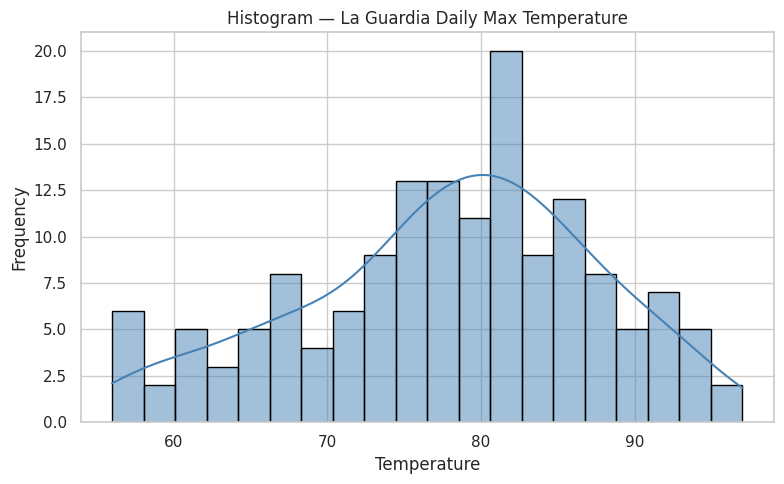

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df[temp_col], bins=20, kde=True,
             color='steelblue', edgecolor='black')
plt.title("Histogram — La Guardia Daily Max Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
# Identify temperature column
if 'Temp' in df.columns:
    temp_col = 'Temp'
elif 'Temperature' in df.columns:
    temp_col = 'Temperature'
else:
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    temp_col = numeric[0]

if 'Month' in df.columns:
    # Add the code to create Temp_Category and labels
    bins = [
        df[temp_col].min() - 1,
        df[temp_col].quantile(0.25),
        df[temp_col].quantile(0.5),
        df[temp_col].quantile(0.75),
        df[temp_col].max() + 1
    ]

    labels = ['Very Low', 'Low', 'Moderate', 'High']
    df['Temp_Category'] = pd.cut(
        df[temp_col],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

    sankey_df = df.groupby(['Month','Temp_Category']).size().reset_index(name='count')
    month_labels = list(map(str, sorted(df['Month'].unique())))
    cat_labels = labels
    nodes = month_labels + cat_labels
    src = sankey_df['Month'].astype(str).map({m:i for i,m in enumerate(month_labels)}).tolist()
    tgt = sankey_df['Temp_Category'].astype(str).map({c: len(month_labels)+i for i,c in enumerate(cat_labels)}).tolist()

    val = sankey_df['count'].tolist()
    sankey_fig = go.Figure(go.Sankey(
        node=dict(label=nodes, pad=12, thickness=15),
        link=dict(source=src, target=tgt, value=val)
    ))
    sankey_fig.update_layout(title_text="Sankey — Month ➜ Temperature Category")
    sankey_fig.show()

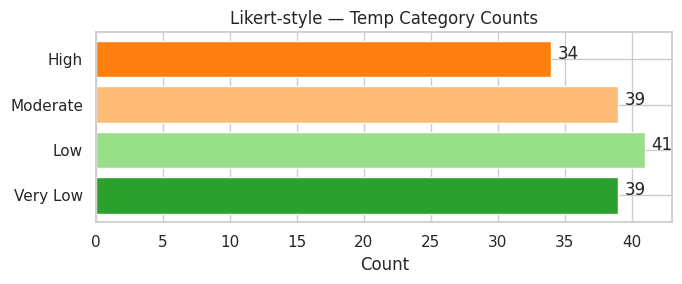

In [8]:
likert_counts = df['Temp_Category'].value_counts().reindex(labels, fill_value=0)
plt.figure(figsize=(7,3))
plt.barh(labels, likert_counts.values, color=['#2ca02c','#98df8a','#ffbb78','#ff7f0e'])
plt.title("Likert-style — Temp Category Counts")
plt.xlabel("Count")
for i, v in enumerate(likert_counts.values):
    plt.text(v+0.5, i, str(int(v)))
plt.tight_layout()
plt.show()

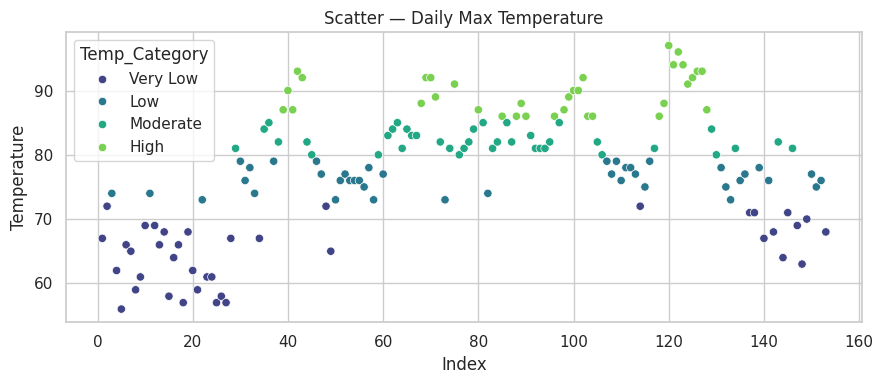

In [10]:
# Create x-axis (date or index)
if 'Date' in df.columns:
    df['__date'] = pd.to_datetime(df['Date'], errors='coerce')
    xcol = '__date'
elif {'Year','Month','Day'}.issubset(df.columns):
    df['__date'] = pd.to_datetime(df[['Year','Month','Day']])
    xcol = '__date'
else:
    df['__day_index'] = np.arange(1, len(df)+1)
    xcol = '__day_index'

plt.figure(figsize=(9,4))
sns.scatterplot(data=df, x=xcol, y=temp_col, hue='Temp_Category', palette='viridis')
plt.xlabel("Date" if xcol == '__date' else "Index")
plt.ylabel("Temperature")
plt.title("Scatter — Daily Max Temperature")
plt.tight_layout()
plt.show()

In [11]:
delta = df[temp_col].diff().fillna(df[temp_col].iloc[0])
measure = ['relative'] * len(delta)
measure[0] = 'absolute'
wf = go.Figure(go.Waterfall(
    x=df.index.astype(str),
    measure=measure,
    y=delta,
    connector={"line":{"color":"gray"}}
))
wf.update_layout(height=450, title="Waterfall — Day-to-day Temperature Change")
wf.show()


In [12]:
gauge_val = float(df[temp_col].mean())
gauge_fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=gauge_val,
    title={'text':f"Gauge — Avg {temp_col}"},
    gauge={'axis':{'range':[float(df[temp_col].min()), float(df[temp_col].max())]}}
))
gauge_fig.show()


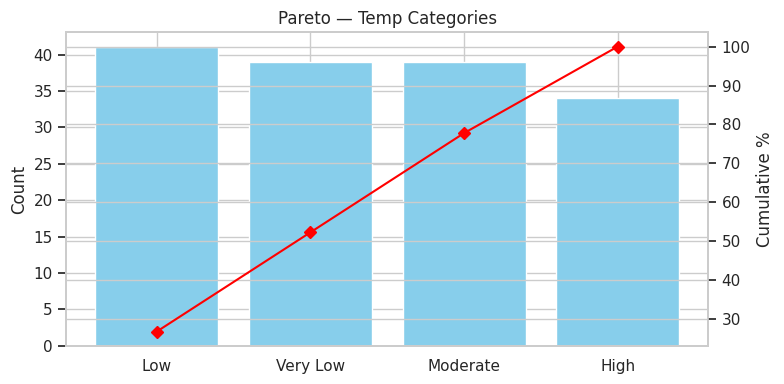

In [13]:
pc = likert_counts.sort_values(ascending=False)
cumperc = pc.cumsum()/pc.sum()*100
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.bar(pc.index.astype(str), pc.values, color='skyblue')
ax1.set_ylabel('Count')
ax2 = ax1.twinx()
ax2.plot(pc.index.astype(str), cumperc.values, color='red', marker='D')
ax2.set_ylabel('Cumulative %')
ax1.set_title("Pareto — Temp Categories")
plt.tight_layout()
plt.show()


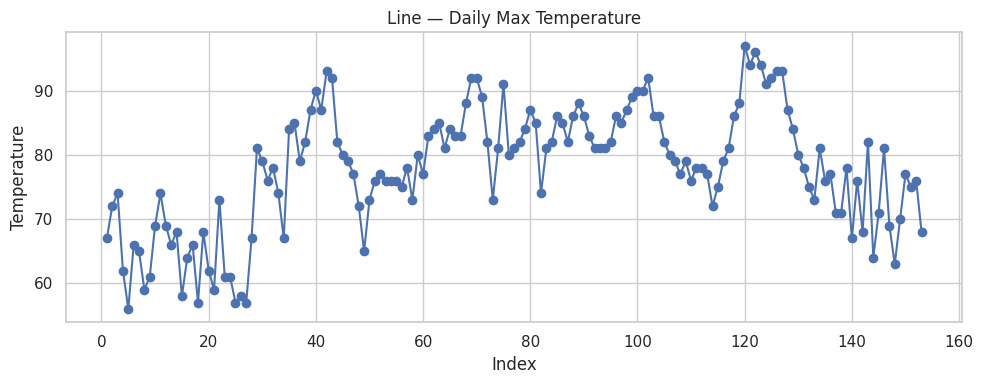

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df[xcol], df[temp_col], marker='o', linestyle='-')
plt.xlabel("Date" if xcol == '__date' else "Index")
plt.title("Line — Daily Max Temperature")
plt.ylabel("Temperature")
plt.tight_layout()
plt.show()
